# Tim's Inverse matrix Shit

In [12]:
import pandas
import numpy as np

# Define Python lists of strings for plotting labels (later)
var_names = ["$y_{t}$", "$\pi_{t}$", "$r_{t}$"]
shock_names = ["y", "pi", "r"]

# Populate entries of matrix A
A = np.eye(3)
A[1,0] = -0.23
A[2,0:2] = np.array([-0.50, -1.50])
# Visualize numbers
print("\nContemporaneous loading factor matrix A is ...\n")
print(A)

# Populate entries of matrix B
B = np.diag([0.56, 0.81, 0.89])
B[0,1::] = np.array([0.12, -0.12])

# Visualize numbers
print("\nLagged loading factor matrix B is ...\n")
print(B)

# Populate entries of matrix C
C = np.diag([-0.12*0.08, 0.23*0.06, 0.005])

# Visualize numbers
print("\nContemporaneous loading factor matrix C is ...\n")
print(C)

# Evaluate the matrix inverse of A and point it to iA
iA = np.linalg.inv(A)
print("\nInverse of A is ...\n")
print(iA)

# Define effective loading matrices
F = iA.dot(B)
G = iA.dot(C)

print("\nF is ...\n")
print(F)
print("\nG is ...\n")
print(G)

# Let's check numerically to see if we have a stable LSDE
roots = np.linalg.eigvals(F)
bools = [np.absolute(roots.real) < 1.0][0]

X = np.array([roots, bools] ).T
column_labels = ["Eigenvalue", "Stable (True/False)"]

# Render table of eigenvalues and stability check to screen
print("\nChecking for stability of LSDE system ...\n")
df = pandas.DataFrame(X, columns=column_labels)
print(df.to_string(index=False))


Contemporaneous loading factor matrix A is ...

[[ 1.    0.    0.  ]
 [-0.23  1.    0.  ]
 [-0.5  -1.5   1.  ]]

Lagged loading factor matrix B is ...

[[ 0.56  0.12 -0.12]
 [ 0.    0.81  0.  ]
 [ 0.    0.    0.89]]

Contemporaneous loading factor matrix C is ...

[[-0.0096  0.      0.    ]
 [ 0.      0.0138  0.    ]
 [ 0.      0.      0.005 ]]

Inverse of A is ...

[[ 1.     0.     0.   ]
 [ 0.23   1.     0.   ]
 [ 0.845  1.5    1.   ]]

F is ...

[[ 0.56    0.12   -0.12  ]
 [ 0.1288  0.8376 -0.0276]
 [ 0.4732  1.3164  0.7886]]

G is ...

[[-0.0096    0.        0.      ]
 [-0.002208  0.0138    0.      ]
 [-0.008112  0.0207    0.005   ]]

Checking for stability of LSDE system ...

Eigenvalue  Stable (True/False)
              (0.50391441147+0j)               (1+0j)
(0.841142794265+0.305965434955j)               (1+0j)
(0.841142794265-0.305965434955j)               (1+0j)


# My Solution to MC-SolowSwan

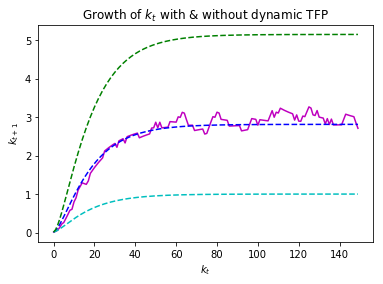


Results ...

      Capital  Consumption    Output   Savings
0    0.010000     0.107388  0.109388  0.002000
1    0.030878     0.152516  0.158691  0.006176
2    0.059528     0.382241  0.394147  0.011906
3    0.132405     0.486650  0.513131  0.026481
4    0.221790     0.259822  0.304180  0.044358
5    0.260447     0.589397  0.641487  0.052089
6    0.362700     0.643028  0.715568  0.072540
7    0.469543     0.685299  0.779207  0.093909
8    0.578431     0.301676  0.417362  0.115686
9    0.604060     1.149317  1.270129  0.120812
10   0.797680     0.768583  0.928118  0.159536
11   0.903535     1.269911  1.450618  0.180707
12   1.103306     0.812313  1.032975  0.220661
13   1.199570     0.821973  1.061887  0.239914
14   1.291990     0.285710  0.544109  0.258398
15   1.271613     0.286939  0.541262  0.254323
16   1.252704     0.826643  1.077184  0.250541
17   1.342870     1.384691  1.653265  0.268574
18   1.539236     0.845103  1.152951  0.307847
19   1.615903     0.848413  1.171594  0.323181

In [160]:
import numpy as np
from matplotlib import pyplot as plt
import pandas

#A_t is described as achieving s in S through some transition matrix P from starting unconditional distro mu0
S = np.array([0.5,1.,1.5])
P = np.array([[0.671,0.029,0.3],[0.145,0.778,0.077],[0,0.508,0.492]])

#Arbitrary mu0
mu0 = np.zeros(3)
mu0[0] = 1

#How many periods in example
T = 150

#mu_values - mu_t, i.e., the unconditional distributions
mu_t = np.zeros((T,P.shape[0]))
mu_t[0,:] = mu0

#need to 'pick' an outcome actually achieved in t, given probability distro mu_t
def pick(S, mu):
    """Pick a state achieved, s in S (without replacement) given probability distribution mu on S"""
    return np.random.choice(S, replace=False, p = mu)

#Calculating A_t
A_t = np.zeros(T)
A_t[0] = pick(S,mu0)

for i in range(T-1):
    mu_next = np.dot(mu_t[i,:],P) #for each t, calculates new unconditional distro
    mu_t[i+1:,] = mu_next #store this value
    A_next = pick(S,mu_next) #for each t, given new uncond. distro, pick from this distro an actualised state
    A_t[i+1] = A_next #store this result

"""Calculating capital per person: k_(t+1) = (1 - delta)*k_t + s(A_t * k_t ** alpha)"""
#Values from previous tutorial T02:
    #Exog. parameters
alpha = 0.33
savings = 0.2
delta = 0.1
    #state variable
k_t = np.zeros(T)
k_t[0] = 0.01 #arbitrary

    #calculate changing capital accumulation, given k_t equation and given A_T
for i in range(T-1):
    k_next = (1 - delta)*k_t[i] + savings*(A_t[i] * (k_t[i]**alpha))
    k_t[i+1] = k_next
    
    #baseline comparison, A_t = A0 = 1
k_t2 = np.zeros(T)
k_t2[0] = 0.01
for i in range(T-1):
    k_next2 = (1 - delta)*k_t2[i] + savings*(1 * (k_t2[i]**alpha))
    k_t2[i+1] = k_next2

k_t3 = np.zeros(T)
k_t3[0] = 0.01
for i in range(T-1):
    k_next3 = (1 - delta)*k_t3[i] + savings*(0.5 * (k_t3[i]**alpha))
    k_t3[i+1] = k_next3    

k_t4 = np.zeros(T)
k_t4[0] = 0.01
for i in range(T-1):
    k_next4 = (1 - delta)*k_t4[i] + savings*(1.5 * (k_t4[i]**alpha))
    k_t4[i+1] = k_next4 
    
y_t = np.zeros(T)
c_t = np.zeros(T)
s_t = np.zeros(T)

for i in range(T):
    y_t[i] = A_t[i] * k_t[i]**alpha
    s_t[i] = savings * k_t[i]
    c_t[i] = y_t[i] - s_t[i]

plt.plot(k_t, 'm-', k_t2, 'b--', k_t3, 'c--', k_t4, 'g--')
#plt.plot()
plt.xlabel('$k_t$')
plt.ylabel('$k_{t+1}$')
plt.title('Growth of $k_t$ with & without dynamic TFP')
plt.show()

Data = np.array([k_t, c_t, y_t, s_t]).T
ColumnLabels = ['Capital', 'Consumption', 'Output', 'Savings']
print("\nResults ...\n")
df = pandas.DataFrame(Data, columns=ColumnLabels)
print(df.to_string(index=True))

In [154]:
df = pandas.DataFrame(Data, columns=ColumnLabels)
cov = df.cov()
print('\nThe covariance matrix is... \n')
print(cov)

mean = df.mean()
print('\nThe Mean values are...\n')
print(mean)

def autocorr(x):
    result = numpy.correlate(x, x, mode='full')
    return result[result.size/2:]

import pylab

def estimated_autocorrelation(x):
    n = len(x)
    variance = x.var()
    x = x-x.mean()
    r = np.correlate(x, x, mode = 'full')[-n:]
    #assert np.allclose(r, np.array([(x[:n-k]*x[-(n-k):]).sum() for k in range(n)]))
    result = r/(variance*(np.arange(n, 0, -1)))
    return result


The covariance matrix is... 

              Capital  Consumption    Output   Savings
Capital      0.381712     0.002685  0.079027  0.076342
Consumption  0.002685     0.207301  0.207838  0.000537
Output       0.079027     0.207838  0.223643  0.015805
Savings      0.076342     0.000537  0.015805  0.015268

The Mean values are...

Capital        2.297978
Consumption    0.772488
Output         1.232083
Savings        0.459596
dtype: float64


In [224]:
print(mu_t[15])
print(A_t[15])

[ 0.23791161  0.5397574   0.22233098]
1.0


[ 1.          0.94706145  0.88976028  0.8344715   0.77882653  0.72213103
  0.66602793  0.61264494  0.562784    0.51244673  0.46436692  0.42019609
  0.37979665  0.33912419  0.30227378  0.26523485  0.23642732  0.21201541
  0.18556683  0.1662177   0.14329827  0.12431647  0.11197612  0.10504833
  0.09361789  0.07818037  0.0646527   0.05175193  0.03923587  0.02667592
  0.0213385   0.01744916  0.00818475  0.00262203 -0.0093578  -0.01236074
 -0.01421746 -0.01597696 -0.01513327 -0.01125329 -0.01508988 -0.01958213
 -0.02186656 -0.01615269 -0.00321384  0.01283075  0.02260493  0.02254474
  0.01306072  0.00391833  0.00575894 -0.00230075 -0.01084789 -0.02645304
 -0.04101788 -0.06523276 -0.08955988 -0.1124783  -0.14384364 -0.17330545
 -0.19829864 -0.22233313 -0.23795955 -0.25065555 -0.25309401 -0.25410039
 -0.26076489 -0.26529405 -0.26839951 -0.25952713 -0.24077296 -0.23421313
 -0.22143896 -0.19519185 -0.17134442 -0.15877228 -0.14381847 -0.12741291
 -0.10801711 -0.09653095 -0.08215093 -0.08141719 -0

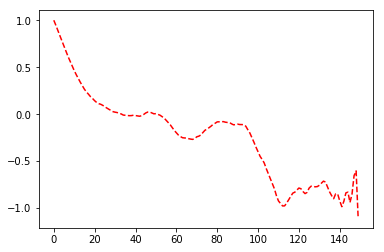

In [159]:
ac_k = estimated_autocorrelation(k_t)
print(ac_k)

plt.plot(ac_k, 'r--')
plt.show()

In [349]:
##Function that achieves above code:##
"""
**McSwan() (c) Chris Higginson 2017**
Markov Chain TFP with Solow Swan Capital accumulation:
McSwan models:
    Output: Data: T x 4 matrix:
                    k_t 'capital stock per person'
                    c_t 'consumption per person'
                    y_t 'output per person'
                    s_t 'savings per person'
            Which is mapping from:
    Input: Experiment parameters:
                [Defaults]: T = 100
           McTFP(): Outputs: A_t (1xT), mu_t (S.size x T)
                    Inputs:
                        [Defaults]: mu_0 = random probability for each state
                                    S = NO DEFAULT
                                    P = NO DEFAULT
                                    T = as above
           Solow-Swan parameters:
                [Defaults:] k_0 = ****TO DETERMINE DEFAULT****
                            d   = 0.1
                            alpha = 0.33 #capital share of output
                            savings = 0.2
"""

import numpy as np
import matplotlib as mpl
import pandas
import IPython.display as display

#Preliminary functions required:
"""1. function to choose, based on prob. distro mu_t a given state A_t in S"""
def TFP_next(S, mu):
    return np.random.choice(S, replace=False, p=mu) #function chooses element in S given mu0

"""2. Function to return, using TFP_next, the 1xT array of A_t 
based on transition matrix P, state space S, and initial distro mu_0"""
def McTFP(S, P, T=100, mu0=None):
    #Determine if initial mu0 is given, or default
    if mu0 == None:
        mu0 = np.zeros(len(S)) #mu is size of list S, state space
        randbasemu0 = np.random.rand(len(S)) #uniformly distributed random number
        for s in range(len(S)):
            mu0[s] = randbasemu0[s]/sum(randbasemu0) #to ensure each mu[i] is s.t they all sum to 1
    
    #Create array mu_t with T rows, S columns (i.e. ==#rows of P)
    mu_t = np.zeros((T,P.shape[0]))
    mu_t[0,:] = mu0
    #Create array A_t populated with zeros, with initial A_t == random choice from mu_t[0]
    A_t = np.zeros(T)
    A_t[0] = TFP_next(S,mu0)
    
    for i in range(T-1):
        mu_next = np.dot(mu_t[i,:],P) #for each t, calculate new mu_t+1 unconditional distro
        mu_t[i+1,:] = mu_next #store this value in mu_t[i+1] row, populating each column i with ith element in mu_next
        A_next = TFP_next(S, mu_next) #chooses from S given prob distro mu_next
        A_t[i+1] = A_next #stores this value
    return [mu_t, A_t]

### Definition of principal function McSwan
def McSwan(S, P, T=100, mu0=None, k0=None, d=0.1, savings=0.2, alpha=0.33):
    if k0==None:
        k0 = np.random.rand(1)
    
    X = McTFP(S, P, T, mu0)
    X[1] = A_t
    
    k_t = np.zeros(T)
    k_t[0] = k0
    
    #calculate changing capital accumulation, given k_t equation and given A_T
    for i in range(T-1):
        k_next = (1 - delta)*k_t[i] + savings*(A_t[i] * (k_t[i]**alpha))
        k_t[i+1] = k_next
    
    #calculating y, c, and investment (s)
    y_t = np.zeros(T)
    c_t = np.zeros(T)
    s_t = np.zeros(T)
    
    for i in range(T):
        y_t[i] = A_t[i] * k_t[i]**alpha
        s_t[i] = savings * k_t[i]
        c_t[i] = y_t[i] - s_t[i]
        
    #Output
    mpl.pyplot.plot(k_t, 'r-', label='$k_t$')
    
    #Now, plotting some comparison Solow-swan growth plans, 1 per element in S.
    ka0 = k_t[0]
    kb0 = k_t[0]
    kc0 = k_t[0]
    graphables = np.zeros((T,3))
    graphables[0,:] = np.array([ka0, kb0, kc0])

    for j in range(len(S)):
        for i in range(T-1):
            k_next = (1 - delta)*graphables[i,j] + savings*(S[j] * (graphables[i,j]**alpha))
            graphables[i+1,j] = k_next
        mpl.pyplot.plot(graphables[:,j],'k--')
        
    mpl.pyplot.xlabel('$k_t$')
    mpl.pyplot.ylabel('$k_{t+1}$')
    mpl.pyplot.title('Growth of $k_t$ with & without dynamic TFP')
    mpl.pyplot.show()
    # Now displaying results: Capital, consumption, output and investment per person
    Data = np.array([k_t, c_t, y_t, s_t]).T
    ColumnLabels = ['Capital', 'Consumption', 'Output', 'Savings']
    print("\nResults ...\n")
    df = pandas.DataFrame(Data, columns=ColumnLabels)
    print(df.to_string(index=True))
    # Displaying Covariance matrix
    df = pandas.DataFrame(Data, columns=ColumnLabels)
    cov = df.cov()
    print('\nThe covariance matrix is... \n')
    print(cov)
    # Displaying mean
    mean = df.mean()
    print('\nThe Mean values are...\n')
    print(mean)
    
    

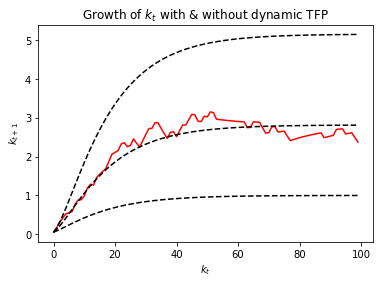


Results ...

     Capital  Consumption    Output   Savings
0   0.055001     0.564986  0.575987  0.011000
1   0.164698     0.794237  0.827177  0.032940
2   0.313663     0.619344  0.682076  0.062733
3   0.418712     0.666553  0.750295  0.083742
4   0.526900     0.299327  0.404707  0.105380
5   0.555151     0.300712  0.411743  0.111030
6   0.581985     1.138223  1.254620  0.116397
7   0.774710     0.764271  0.919213  0.154942
8   0.881082     0.303324  0.479541  0.176216
9   0.888882     0.784098  0.961875  0.177776
10  0.992368     1.297739  1.496213  0.198474
11  1.192374     0.821306  1.059781  0.238475
12  1.285093     0.286130  0.543148  0.257019
13  1.265213     1.368041  1.621083  0.253043
14  1.462909     0.841180  1.133761  0.292582
15  1.543370     0.845298  1.153972  0.308674
16  1.619827     0.848566  1.172532  0.323965
17  1.692351     1.445933  1.784404  0.338470
18  1.879997     1.471410  1.847409  0.375999
19  2.061479     0.857340  1.269635  0.412296
20  2.109258     0.8

In [347]:
S = np.array([0.5,1.,1.5])
P = np.array([[0.671,0.029,0.3],[0.145,0.778,0.077],[0,0.508,0.492]])

McSwan(S, P)